# Hypothesis Testing with Insurance Data
Jacob Tanzi

#### Working with the US Health Insurance Dataset from Kaggle.

#### Use hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?





In [66]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
import scipy.stats as stats
scipy.__version__

'1.9.3'

In [2]:
df = pd.read_csv('\\Users\Jacob\Downloads\insurance.core. insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. 
#### Do smokers have higher insurance charges than non-smokers?

- *Null Hypothesis* 
 * There is no difference in charges between smokers and non smokers 
- *Alternative Hypothesis* 
 * There is a significant difference in charges between smokers and non smokers 

* Select the correct test according to the data type and number of samples
 * Numerical Data
 * Two groups/samples- smokers and non
 * Run a 2-sample T-test.

In [3]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [5]:
# no null values from columns needed


In [6]:
df['smoker_y'] = df['smoker'].str.contains('yes')
df['smoker_y'].value_counts()

False    1064
True      274
Name: smoker_y, dtype: int64

In [8]:
needed_cols = ['smoker_y','charges']

df[needed_cols]

,smoker_y,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [9]:
non_smoker_df = df.loc[ df['smoker_y']==False, needed_cols]
non_smoker_df

,smoker_y,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [10]:
smoker_df = df.loc[ df['smoker_y']==True, needed_cols]
smoker_df

,smoker_y,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [11]:
plot_df = pd.concat([smoker_df,non_smoker_df])
plot_df

,smoker_y,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


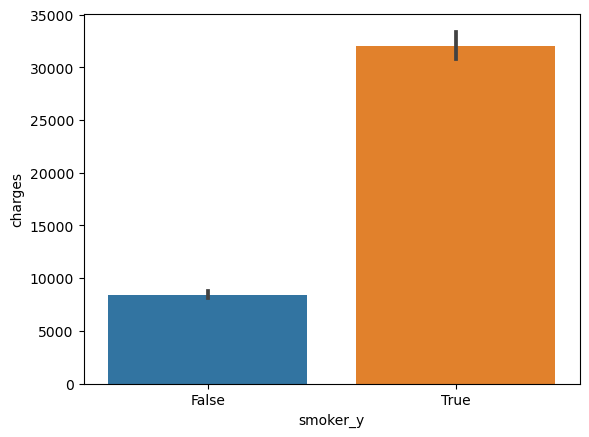

In [13]:
sns.barplot(data=plot_df, x='smoker_y',y='charges');

#### Test the assumptions of your selected test.


In [14]:
smoker_group = smoker_df['charges']
non_group = non_smoker_df['charges']


In [15]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [16]:
non_outliers = np.abs(stats.zscore(non_group)) > 3
non_outliers.sum()

24

In [17]:
non_group = non_group.loc[~non_outliers]
non_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [18]:
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64


#### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [19]:
result = stats.levene(smoker_group, non_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [20]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


#### Interpret your p-value and reject or fail to reject your null hypothesis 


In [21]:
result = stats.ttest_ind(smoker_group, non_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [22]:
smoker_group.mean()

32050.23183153284

In [23]:
non_group.mean()

7939.8608446721155

### *Reject the null hypothesis and support the alternative that there is a significant difference between smokers and non smoker charges*  

####  Show a supporting visualization that helps display the result

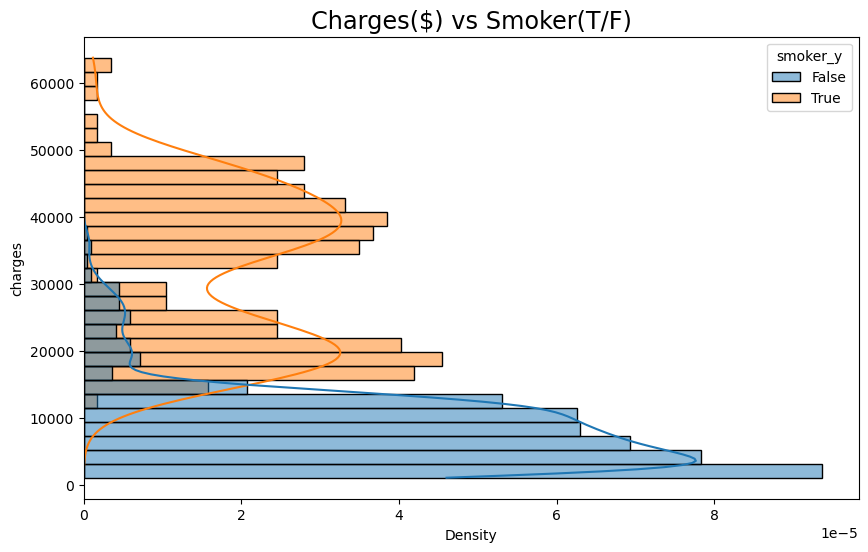

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=plot_df, y='charges',fill=True,hue='smoker_y',kde=True,
                  stat='density',common_norm=False)
ax.ticklabel_format(style='plain', axis='y')
plt.title('Charges($) vs Smoker(T/F)', fontsize='xx-large');

*We can see the concentration of smokers with higher charges at the top and bulk of the non smokers at the lowest section.* 

# Q2.
#### Are men more likely to smoke than women?


- *Null Hypothesis* 
 * There is no difference between men and women and their likelihood to smoke 
- *Alternative Hypothesis* 
 * There is a significant difference, men are more likely to smoke than women 

* Select the correct test according to the data type and number of samples
 * Categorical Data
 * Two groups/samples- sex and smoker
 * Chi-Square

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_y
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [61]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [5]:
# no null values from columns needed


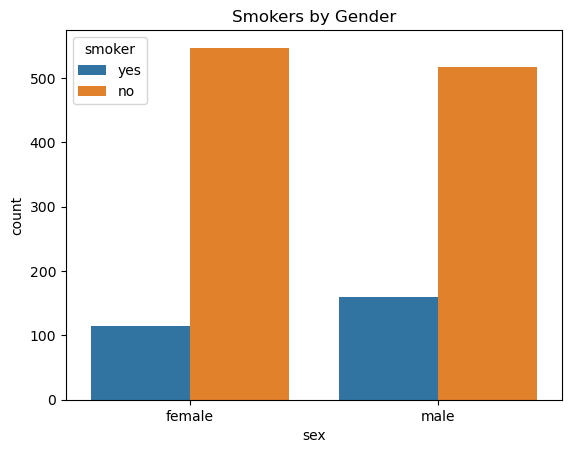

In [62]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smokers by Gender");

#### Test the assumptions of your selected test.


#### Getting the Contingency Table 

In [68]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159



#### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [69]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [70]:
print(p)
p<.05

0.006548143503580696


True

#### Interpret your p-value and reject or fail to reject your null hypothesis 


* The p-value is less than 0.05


* Since our p < .05, reject the null hypothesis that there is no relationship between men and women and their likelihood to smoke.

* We accept the alternate hypothesis 
 * There is a significant difference, men are more likely to smoke than women

####  Show a supporting visualization that helps display the result

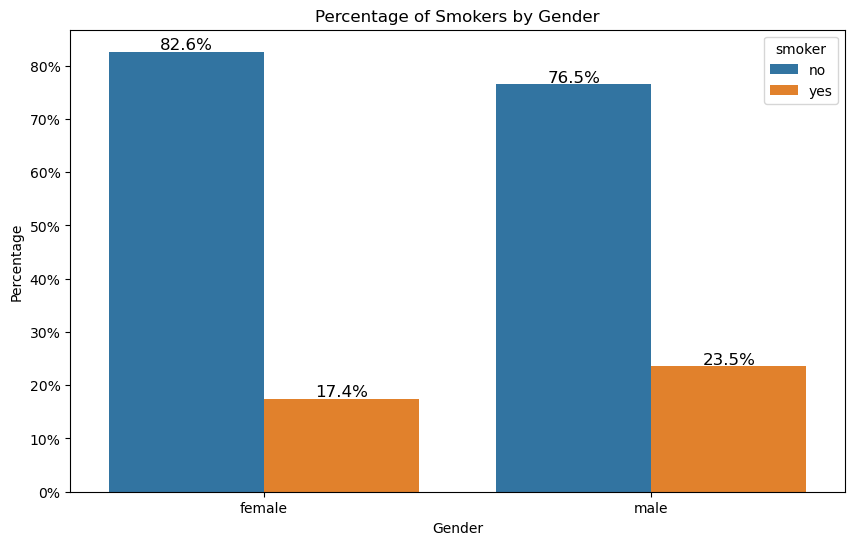

In [78]:
smoker_percentage = df.groupby('sex')['smoker'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=smoker_percentage, x='sex', y='percentage', hue='smoker')

ax.set(ylabel='Percentage')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Percentage of Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

# Q3. 
#### Do different regions have different charges, on average?

- *Null Hypothesis* 
 * There is no difference in charges between regions on average
- *Alternative Hypothesis* 
 * There is a significant difference in regional charges compared to the average

* Select the correct test according to the data type and number of samples
 * Numerical Data
 * More than two groups/samples
 * T-test or ANOVA 

In [79]:

df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_y
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [80]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [81]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [5]:
# no null values from columns needed


In [82]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

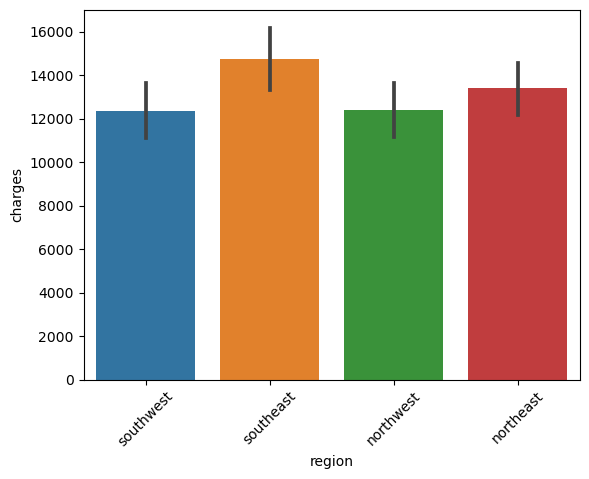

In [84]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [87]:
need_cols = ['region','charges']
df[need_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [88]:
groups ={}

for region in df['region'].unique():
    temp = df.loc[df['region']== region, 'charges']
    groups[region] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [89]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

#### Test the assumptions of your selected test.


In [90]:
for region, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.



#### Execute the selected test, or the alternative test (if you do not meet the assumptions)


In [91]:
norm_results = [['group','n','pval','sig?']]

## loop through group dict
for region, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([region,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


*over 20 can assume normality* 

In [92]:
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

* *The p-value is greater than alpha*

* *We fail to reject the null hypothesis. There is no significant difference between groups.*

####  Show a supporting visualization that helps display the result

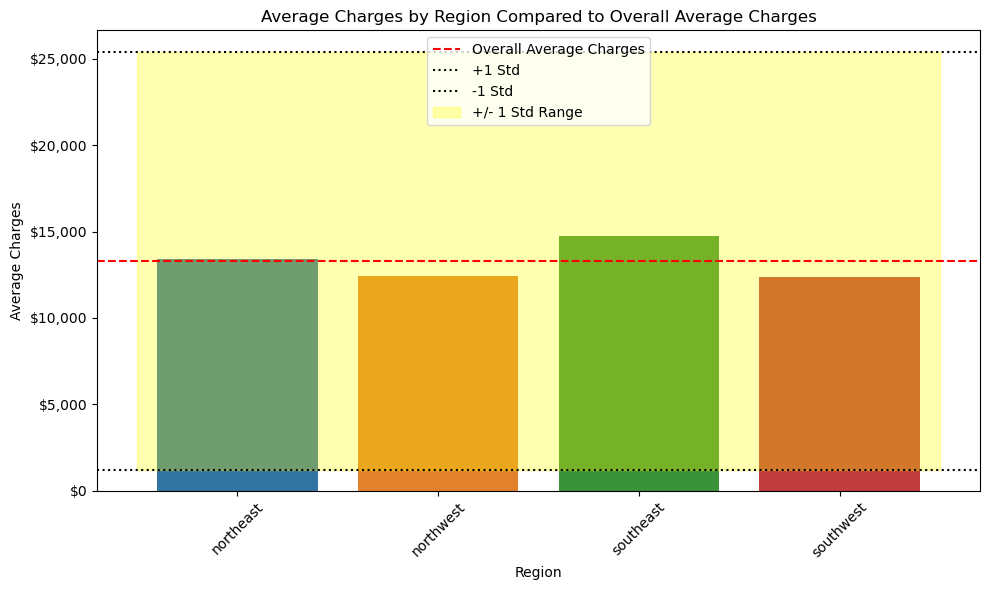

In [105]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

overall_average_charges = df['charges'].mean()
std = df['charges'].std()

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=average_charges_by_region, x='region', y='charges')

plt.axhline(y=overall_average_charges, color='red', linestyle='--', label='Overall Average Charges')
plt.axhline(overall_average_charges + std, color='black', linestyle='dotted', label='+1 Std')
plt.axhline(overall_average_charges - std, color='black', linestyle='dotted', label='-1 Std')

plt.axvspan(-0.5, len(average_charges_by_region) - 0.5, ymin=(overall_average_charges - std) / ax.get_ylim()[1],
            ymax=(overall_average_charges + std) / ax.get_ylim()[1], color='yellow', alpha=0.3, label='+/- 1 Std Range')


ax.set(ylabel='Average Charges')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.title('Average Charges by Region Compared to Overall Average Charges')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

* ####  Each region is within the range